In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data = pd.read_csv("data\\train.csv")

In [39]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [40]:
data.shape

(6019, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [42]:
echange = 0.011
def prix_euro(price):
    return price * 100000 * echange
data["prix_euro"] = data["Price"].map(prix_euro)

In [43]:
data['marque_modele'] = data['Name'].str.split(' ', n=2, expand=True).iloc[:, :2].agg(' '.join, axis=1)

In [44]:
data.drop(["Name","Price","New_Price","Location"], axis=1, inplace=True)
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1925.0,Maruti Wagon
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,13750.0,Hyundai Creta
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4950.0,Honda Jazz
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6600.0,Maruti Ertiga
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,19514.0,Audi A4


In [45]:
np.count_nonzero(data["marque_modele"].unique())

216

In [52]:
data[data["Fuel_Type"] == "Electric"]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele
4446,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,14300.0,Mahindra E
4904,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,14025.0,Toyota Prius


In [53]:
# supprimer les deux ligne de Fuel_Type = Electric parceque on a juste deux lignes
data.drop([4446,4904], axis=0, inplace=True)

In [54]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,prix_euro
count,6017.000000,6.017000e+03,6017.000000,5981.000000,5874.000000,5975.000000,6017.000000
mean,2013.358152,5.874228e+04,18.134961,1621.505935,113.272203,5.278828,10426.173675
std,3.269967,9.128375e+04,4.582289,601.117630,53.873317,0.808959,12308.565598
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,484.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3850.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,6204.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,10945.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,176000.000000


<Axes: xlabel='prix_euro', ylabel='Count'>

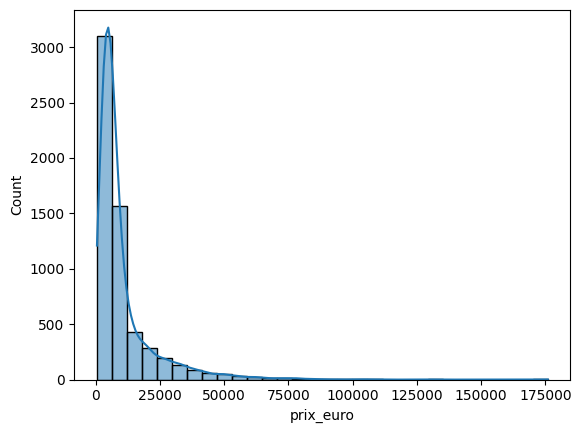

In [55]:
sns.histplot(data["prix_euro"], bins=30, kde=True)

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

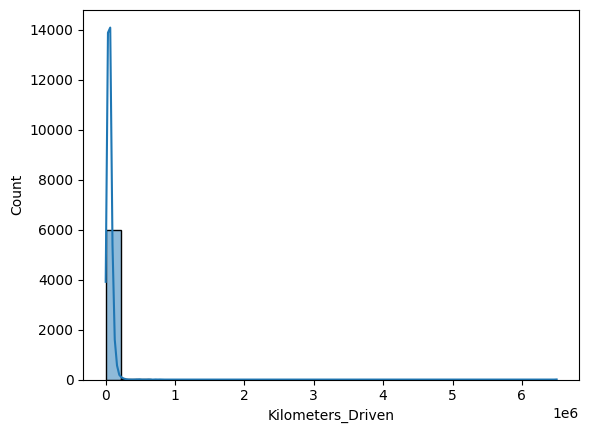

In [56]:
sns.histplot(data["Kilometers_Driven"], bins=30, kde=True)

<Axes: xlabel='Seats', ylabel='Count'>

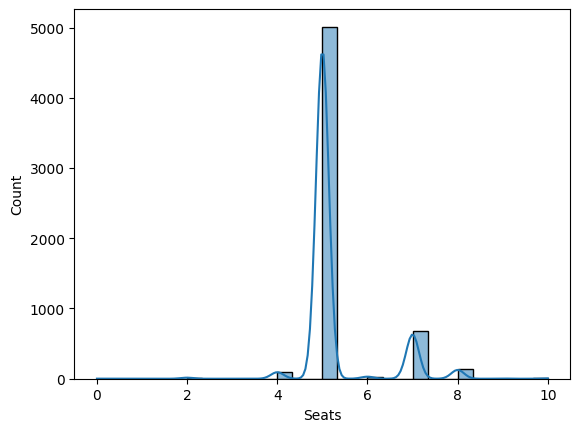

In [57]:
sns.histplot(data["Seats"], bins=30, kde=True)

<Axes: xlabel='Year', ylabel='Count'>

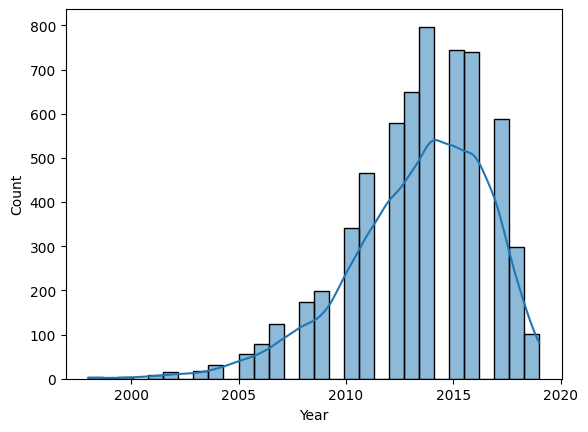

In [58]:
sns.histplot(data["Year"], bins=30, kde=True)

In [59]:
# prix par rapport Location
plt.figure(figsize=(12,8))
plt.bar(data["Location"], height=data["prix_euro"])
plt.xlabel("localisation en Inde")
plt.ylabel("le prix en euro")

KeyError: 'Location'

<Figure size 1200x800 with 0 Axes>

In [60]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["marque"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("marque de voiture")
plt.ylabel("le prix en euro")

KeyError: 'marque'

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'le prix en euro')

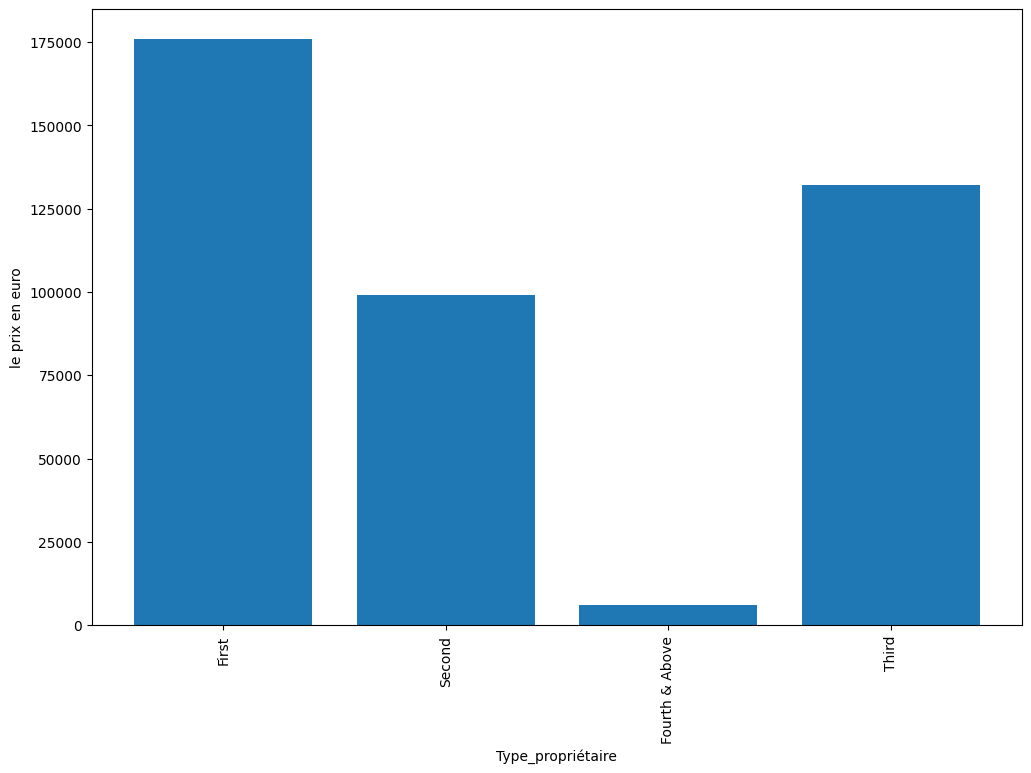

In [61]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["Owner_Type"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("Type_propriétaire")
plt.ylabel("le prix en euro")

il y a Automatic => 1720 / Manual => 4299, mais 

Text(0, 0.5, 'le prix en euro')

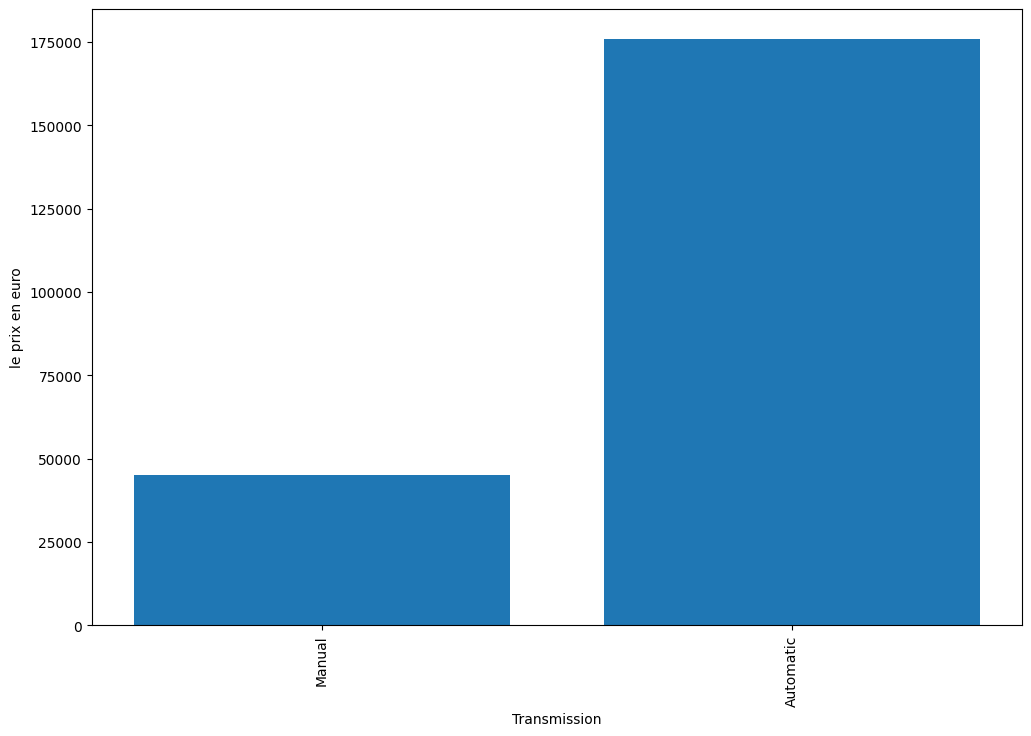

In [62]:
# prix par rapport marque
plt.figure(figsize=(12,8))
plt.bar(data["Transmission"], height=data["prix_euro"])
plt.xticks(rotation=90)
plt.xlabel("Transmission")
plt.ylabel("le prix en euro")

In [63]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1925.0,Maruti Wagon
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0,Hyundai Creta
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0,Honda Jazz
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0,Maruti Ertiga
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0,Audi A4


In [ ]:
# convertir str => float
data['Engine'] = data['Engine'].str.replace("CC", "").astype(float, errors='ignore')
data['Power'] = pd.to_numeric(data['Power'].str.replace("bhp", ""), errors="coerce")
data["Mileage"] = data["Mileage"].str.replace("km/kg", "")
data["Mileage"] = data["Mileage"].str.replace("kmpl", "").astype(float, errors='ignore')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Fuel_Type          6017 non-null   object 
 3   Transmission       6017 non-null   object 
 4   Owner_Type         6017 non-null   object 
 5   Mileage            6017 non-null   float64
 6   Engine             5981 non-null   float64
 7   Power              5874 non-null   float64
 8   Seats              5975 non-null   float64
 9   prix_euro          6017 non-null   float64
 10  marque_modele      6017 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 564.1+ KB


<Axes: title={'center': 'matrice correlation pour les nombres'}>

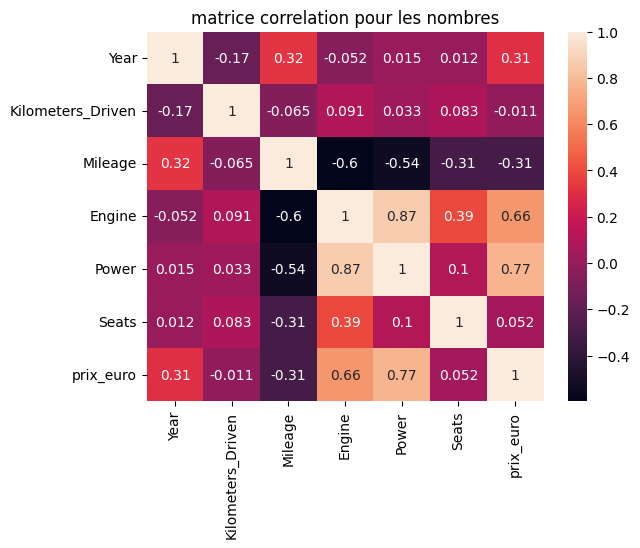

In [67]:
plt.title("matrice correlation pour les nombres")
sns.heatmap(data.select_dtypes(np.number).corr(), annot=True)

<Axes: title={'center': 'graphique pour les valeur NaN'}>

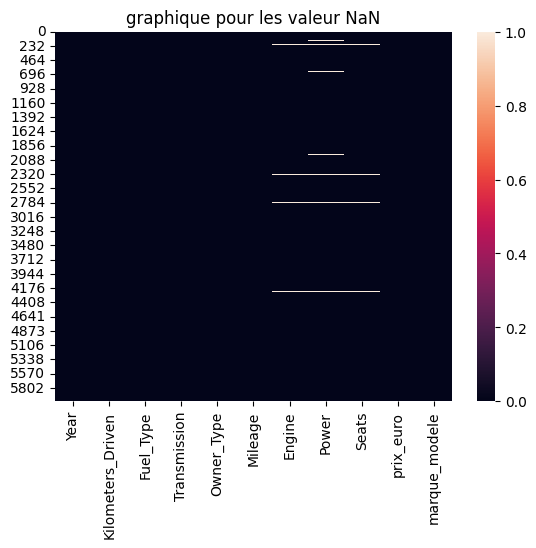

In [68]:
plt.title("graphique pour les valeur NaN")
sns.heatmap(data.isna())

# remplacer les NaN par des valeur semblable de la meme marque_modele

In [108]:
# combien NaN il y a dans chaque marque 
data[data.isna().any(axis=1)].groupby("marque_modele").size()

marque_modele
Audi A4                   1
BMW 5                     5
Chevrolet Optra           1
Fiat Petra                1
Fiat Punto                3
Fiat Siena                1
Ford Endeavour            2
Ford Fiesta               3
Ford Figo                 1
Honda CR-V                2
Honda City                5
Honda Jazz                1
Hyundai Santro           49
Land Rover                3
Mahindra Bolero           1
Mahindra Jeep             2
Maruti 1000               1
Maruti Baleno             2
Maruti Esteem             3
Maruti Estilo             3
Maruti Swift             26
Maruti Wagon              1
Mercedes-Benz E-Class     2
Nissan Micra              1
Nissan Teana              1
Porsche Cayman            2
Skoda Laura               1
Smart Fortwo              1
Tata Indica               3
Toyota Etios             14
Toyota Qualis             2
Volkswagen Jetta          1
dtype: int64

In [ ]:
data.isna().sum() # les valeur manquente 

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
prix_euro              0
marque_modele          0
dtype: int64

In [ ]:
# remplacer les nan 
### BWM => fini
### Honda CR-V => fini
### Fiat Punto => fini
### Maruti Swift => fini
### Hyundai Santro => fini
### Honda City => fini
### Land Rover => fini
### Toyota Etios => fini
### Maruti Wagon => fini
### Honda Jazz => fini
# fini !!!
data[data["Engine"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [ ]:
### Hyundai Santro => fini
### Maruti Swift => fini
### Toyota Etios =< fini
### Audi A4 => fini
### Chevrolet Optra => fini
### Fiat Petra  => fini
### Fiat Siena  => fini
### Ford Endeavour => fini
### Ford Fiesta => fini
### Honda CR-V  => fini
### Mahindra Bolero => fini
### Mahindra Jeep => fini
### Mahindra Jeep => fini
### Mahindra Jeep => fini
### Mahindra Jeep => fini
### Maruti 1000 =>   fini          
### Maruti Baleno  =>     fini    
### Maruti Esteem  =>       fini   
### Maruti Estilo    =>        fini
### Mercedes-Benz E-Class  =>  fini
### Nissan Micra  =>  fini         
### Nissan Teana =>  fini          
### Porsche Cayman   =>    fini    
### Skoda Laura =>  fini           
### Smart Fortwo  =>  fini         
### Tata Indica  => fini           
### Toyota Qualis  =>  fini        
### Volkswagen Jetta  =>fini

data[data["Power"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [590]:
### Ford Figo => fini
### Honda City  => fini
data[data["Seats"].isna()].groupby("marque_modele").size() 

Series([], dtype: int64)

In [579]:
data[(data["marque_modele"] == "Honda City") & (data["Year"] == 2005)]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele
652,2005,100000,Petrol,Automatic,Third,16.4,1497.0,78.0,5.0,2156.0,Honda City
1217,2005,56000,Petrol,Manual,Second,17.7,1497.0,78.0,5.0,1375.0,Honda City
1279,2005,98437,Petrol,Manual,First,13.0,1493.0,100.0,5.0,1265.0,Honda City
1917,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,1870.0,Honda City
3721,2005,123000,Petrol,Manual,Third,13.0,1493.0,100.0,5.0,1210.0,Honda City
4767,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,1210.0,Honda City


In [588]:
data.loc[1917, "Seats"] = 5

In [589]:
data[(data["marque_modele"] == "Honda City") & (data["Seats"].isna())]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,prix_euro,marque_modele


In [595]:
data.to_csv("data_nan_remplit_main.csv", index=False)